# Preparation

In [20]:
# Import des bibliothèques nécessaires
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
# Import des modèles et métriques
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

import numpy as np

import matplotlib.pyplot as plt


In [3]:
# Chargement du jeu de données
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])

In [15]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
y

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


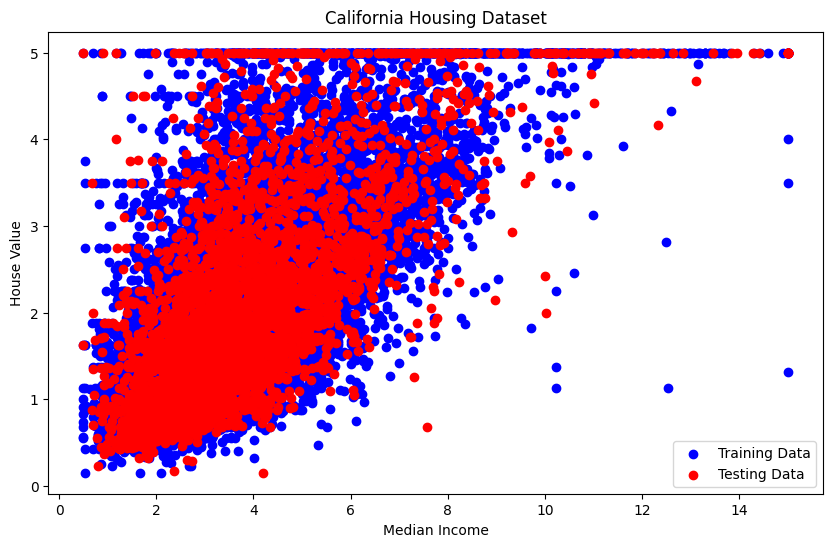

In [13]:
# Visualisation des données
plt.figure(figsize=(10, 6))
plt.scatter(X_train['MedInc'], y_train, color='blue', label='Training Data')
plt.scatter(X_test['MedInc'], y_test, color='red', label='Testing Data')
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.title('California Housing Dataset')
plt.legend()
plt.show()

In [4]:
# Application de train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrainement

In [5]:
# Entraînement du modèle de régression linéaire multiple avec validation croisée
lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print("Linear Regression Cross-Validation Scores:", lr_scores)
print("Mean Linear Regression Cross-Validation Score:", np.mean(lr_scores))

Linear Regression Cross-Validation Scores: [0.62011512 0.61298876 0.6134416  0.61069973 0.60017477]
Mean Linear Regression Cross-Validation Score: 0.6114839952560998


In [6]:
# Entraînement du modèle RandomForest avec validation croisée
rf_model = RandomForestRegressor()
rf_scores = cross_val_score(rf_model, X_train, y_train.values.ravel(), cv=5)
print("RandomForest Cross-Validation Scores:", rf_scores)
print("Mean RandomForest Cross-Validation Score:", np.mean(rf_scores))

RandomForest Cross-Validation Scores: [0.80542758 0.79288575 0.8104569  0.80483671 0.80601187]
Mean RandomForest Cross-Validation Score: 0.8039237615441095


In [7]:
# from sklearn.model_selection import GridSearchCV

# # Définition des hyperparamètres à rechercher
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# # Initialisation du GridSearchCV
# grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2')

# # Recherche des meilleurs hyperparamètres
# grid_search.fit(X_train, y_train.values.ravel())

# # Meilleurs hyperparamètres trouvés
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

In [8]:
# # Entraînement du modèle avec les meilleurs hyperparamètres
# best_rf_model = RandomForestRegressor(**best_params)
# best_rf_model.fit(X_train, y_train.values.ravel())

In [9]:
# # Évaluation des performances sur le jeu d'apprentissage
# train_score = best_rf_model.score(X_train, y_train)
# print("RandomForest Training Score with Best Parameters:", train_score)

# Evaluation

In [10]:
# Entraînement du modèle de régression linéaire multiple
lr_model.fit(X_train, y_train)

# Évaluation des performances sur le jeu de test
test_score = lr_model.score(X_test, y_test)
print("Linear Regression Test Score:", test_score)

Linear Regression Test Score: 0.5757877060324511


In [11]:
# Évaluation des performances du modèle RandomForest sur le jeu de test
rf_model.fit(X_train, y_train.values.ravel())
rf_test_score = rf_model.score(X_test, y_test)
print("RandomForest Test Score:", rf_test_score)

RandomForest Test Score: 0.8051918076458356


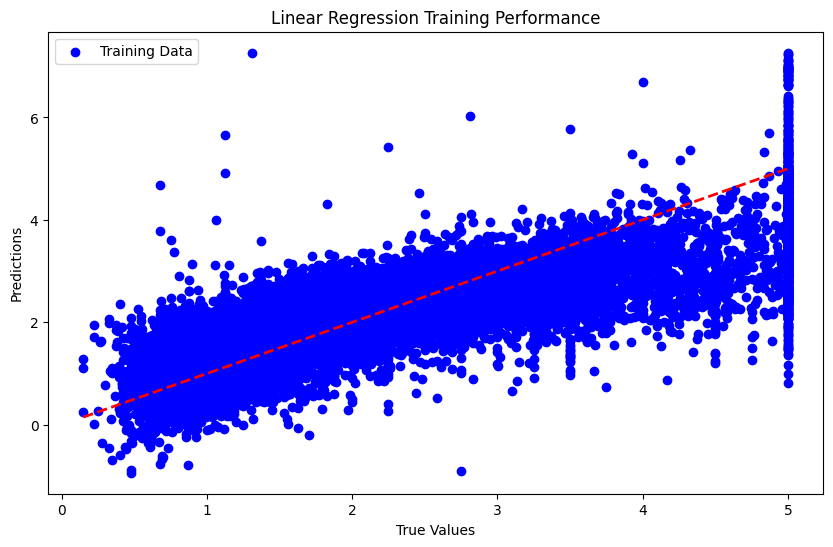

In [18]:
# Prédiction sur le jeu d'entraînement
train_predictions = lr_model.predict(X_train)

# Visualisation des prédictions par rapport aux vraies valeurs sur le jeu d'entraînement
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', label='Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Training Performance')
plt.legend()
plt.show()

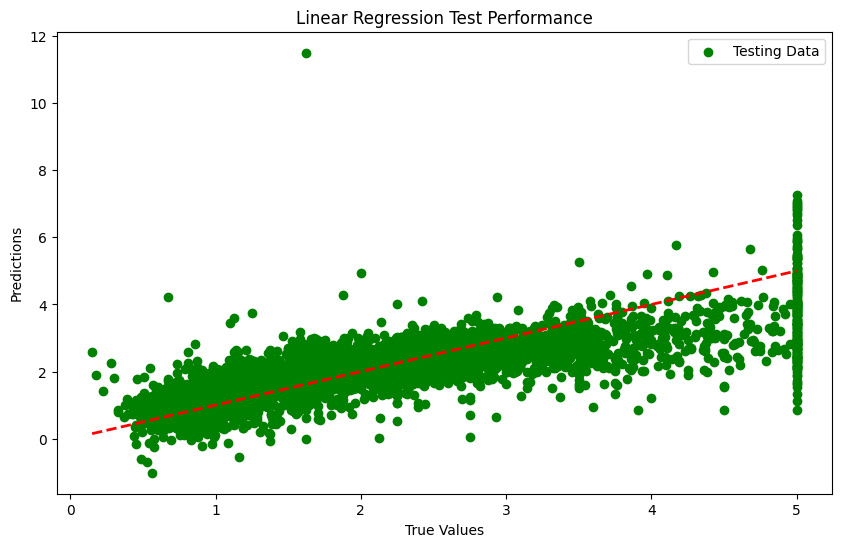

In [19]:
# Prédiction sur le jeu de test
test_predictions = lr_model.predict(X_test)

# Visualisation des prédictions par rapport aux vraies valeurs sur le jeu de test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='green', label='Testing Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Test Performance')
plt.legend()
plt.show()

In [21]:
# Calcul de l'erreur quadratique moyenne (RMSE) sur le jeu de test
rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))

# Calcul de l'erreur absolue moyenne (MAE) sur le jeu de test
mae_test = mean_absolute_error(y_test, test_predictions)

print("Linear Regression Model Evaluation:")
print("RMSE on Test Data:", rmse_test)
print("MAE on Test Data:", mae_test)

Linear Regression Model Evaluation:
RMSE on Test Data: 0.7455813830127761
MAE on Test Data: 0.5332001304956558
